<a href="https://colab.research.google.com/github/faddednatasha/Sky-Analytics/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import re

In [4]:
data=pd.read_csv('cleaned_flight_data.csv')
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_date,day,month,departure_time_numeric,arrival_time_numeric,duration_numeric
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2025-06-08,8,6,18,22,2.17
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2025-06-08,8,6,5,9,2.33
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2025-06-08,8,6,5,5,2.17
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2025-06-08,8,6,9,13,2.25
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2025-06-08,8,6,9,9,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2025-07-26,26,7,9,18,10.08
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2025-07-26,26,7,13,22,10.42
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2025-07-26,26,7,5,22,13.83
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2025-07-26,26,7,5,18,10.00


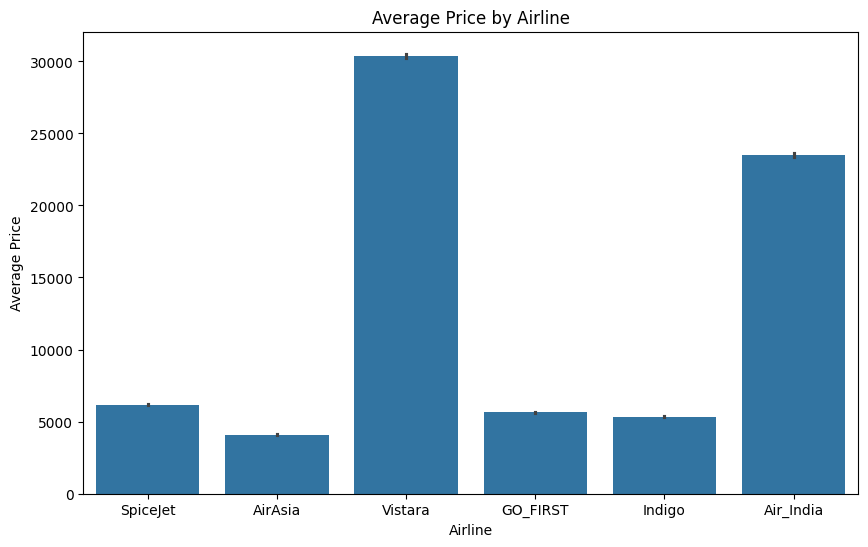

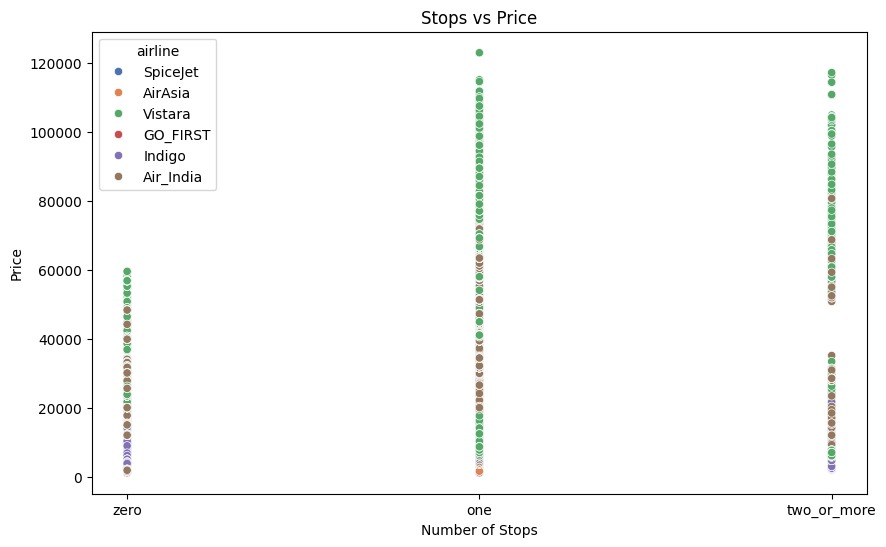

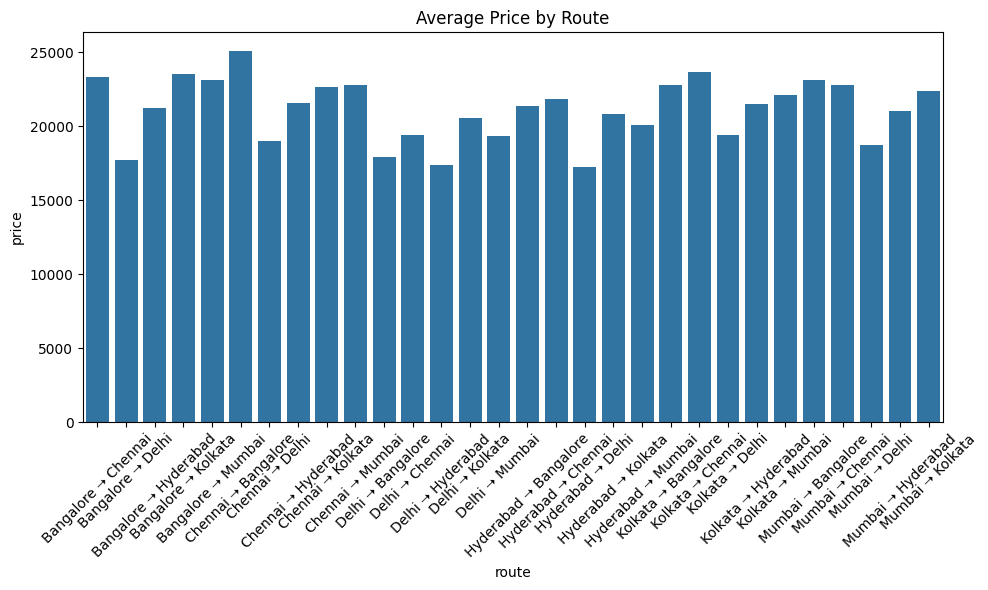

In [5]:
# 1. **Price by Airline (Bar Chart)**
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=data)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

# 2. **Stops vs Fare (Scatter Plot)**
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stops', y='price', data=data, hue='airline', palette='deep')
plt.title('Stops vs Price')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

# 3. **Source-Destination Routes (Bar Chart)**
# Combine source and destination into a route
data['route'] = data['source_city'] + " ➝ " + data['destination_city']
route_prices = data.groupby('route')['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=route_prices, x='route', y='price')
plt.title("Average Price by Route")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# 4. **Dynamic Summary Stats (Plotly Dashboard)**
import plotly.express as px
fig = px.sunburst(data, path=['airline', 'route'], values='price', title="Price Breakdown by Airline and Route")
fig.show()